<a href="https://colab.research.google.com/github/DonRoboto/ReinforcementLearning_v1/blob/main/Ejercicio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")


In [4]:
action_space = env.action_space
observation_space = env.observation_space

print(action_space)
print(observation_space)

Discrete(4)
Discrete(16)


##### Actions and action space

In this environment, there are four different actions and they are represented by integers:

\begin{equation}
a \in \{0, 1, 2, 3\}
\end{equation}

- 0 -> move left
- 1 -> move down
- 2 -> move right
- 3 -> move up

To execute an action, simply pass it as an argument to the env.step method. Information about the action space is stored in the env.action_space property which is of Discrete(4) class. This means that in this case it only consists of an element in the range [0,4), unlike the state space seen above.


##### Trajectories and episodes

A trajectory is the sequence generated by moving from one state to another (both arbitrary)

\begin{equation}
  \tau = S_0, A_0, R_1, S_1, A_1, ... R_N, S_N,
\end{equation}

Let's generate a trajectory of 3 moves in code:

In [5]:
state, _ = env.reset()
trajectory = []
for _ in range(3):
    action = env.action_space.sample()
    next_state, reward, done, _, _ = env.step(action)
    trajectory.append([state, action, reward])
    state = next_state
env.close()

print(f"Trajectory:\n{trajectory}")


Trajectory:
[[0, 3, 0.0], [0, 1, 0.0], [4, 1, 0.0]]


An episode is a trajectory that goes from the initial state of the process to the final one:

\begin{equation}
  \tau = S_0, A_0, R_1, S_1, A_1, ... R_T, S_T,
\end{equation}
where T is the terminal state.

Let's generate a whole episode in code:

In [6]:
state, _ = env.reset()
episode = []
done = False
while not done:
    action = env.action_space.sample()
    next_state, reward, done, _, _ = env.step(action)
    episode.append([state, action, reward])
    state = next_state
env.close()

print(f"Episode:\n{episode}")

Episode:
[[0, 0, 0.0], [0, 2, 0.0], [1, 2, 0.0], [2, 2, 0.0], [3, 0, 0.0], [2, 1, 0.0], [6, 2, 0.0]]


##### Rewards and returns

A reward is numerical feedback that the environment generates when the agent takes an action *a* in a state *s*:

\begin{equation}
    r = r(s, a)
\end{equation}

Let's generate a reward from the environment:

In [7]:

state, _ = env.reset()
action = env.action_space.sample()
_, reward, _, _, _ = env.step(action)
print(f"We achieved a reward of {reward} by taking action {action} in state {state}")

We achieved a reward of 0.0 by taking action 3 in state 0


The return associated with a moment in time *t* is the sum (discounted) of rewards that the agent obtains from that moment. We are going to calculate $G_0$, that is, the return to the beginning of the episode:

\begin{equation}
    G_0 = R_1 + \gamma R_2 + \gamma^2 R_3 + ... + \gamma^{T-1} R_T
\end{equation}



Let's assume that the discount factor $\gamma = 0.99$:


In [8]:
state, _ = env.reset()
done = False
gamma = 0.99
G_0 = 0
t = 0
while not done:
    action = env.action_space.sample()
    _, reward, done, _, _ = env.step(action)
    G_0 += gamma ** t * reward
    t += 1
env.close()

print(
    f"""It took us {t} moves to done,
    and each reward r(s,a)=0, so the return amounts to {G_0}""")

It took us 4 moves to done, 
    and each reward r(s,a)=0, so the return amounts to 0.0


The new episode will start in state: (0, {'prob': 1})


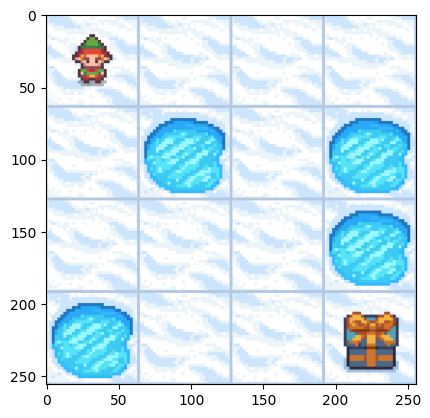

In [9]:
initial_state = env.reset()
print(f"The new episode will start in state: {initial_state}")
img = env.render()
plt.imshow(img)


After moving down 1 row, the agent is in state: 4
After moving down 1 row, we got a reward of: 0.0
After moving down 1 row, the task is not finished


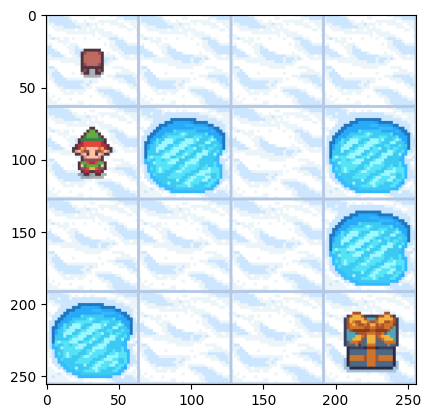

In [10]:
action = 1
next_state, reward, done, info, _ = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print("After moving down 1 row, the task is", "" if done else "not", "finished")
img = env.render()
plt.imshow(img)

After moving down 1 row, the agent is in state: 8
After moving down 1 row, we got a reward of: 0.0
After moving down 1 row, the task is not finished


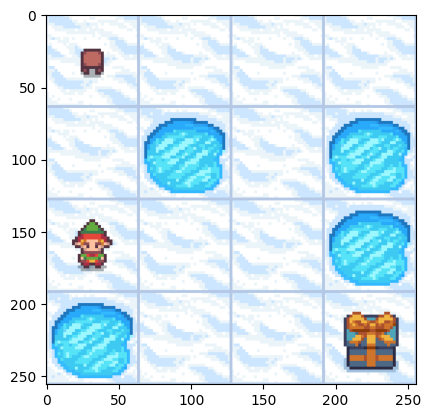

In [11]:
action = 1
next_state, reward, done, info, _ = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print("After moving down 1 row, the task is", "" if done else "not", "finished")
img = env.render()
plt.imshow(img)

After moving down 1 row, the agent is in state: 12
After moving down 1 row, we got a reward of: 0.0
After moving down 1 row, the task is  finished


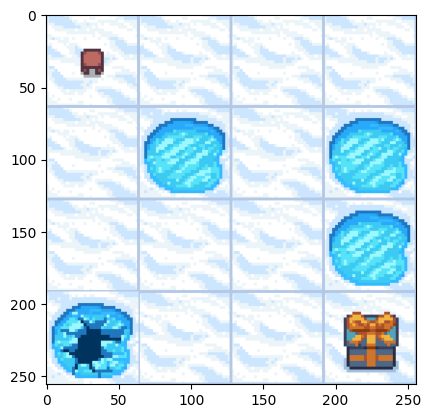

In [12]:
action = 1
next_state, reward, done, info, _ = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print("After moving down 1 row, the task is", "" if done else "not", "finished")
img = env.render()
plt.imshow(img)

action: 3
state: 0
reward: 0.0
=#####=
action: 1
state: 4
reward: 0.0
=#####=
action: 0
state: 4
reward: 0.0
=#####=
action: 1
state: 8
reward: 0.0
=#####=
action: 0
state: 8
reward: 0.0
=#####=
action: 3
state: 4
reward: 0.0
=#####=
action: 0
state: 4
reward: 0.0
=#####=
action: 1
state: 8
reward: 0.0
=#####=
action: 2
state: 9
reward: 0.0
=#####=
action: 0
state: 8
reward: 0.0
=#####=
action: 3
state: 4
reward: 0.0
=#####=
action: 0
state: 4
reward: 0.0
=#####=
action: 0
state: 4
reward: 0.0
=#####=
action: 1
state: 8
reward: 0.0
=#####=
action: 3
state: 4
reward: 0.0
=#####=
action: 2
state: 5
reward: 0.0
=#####=


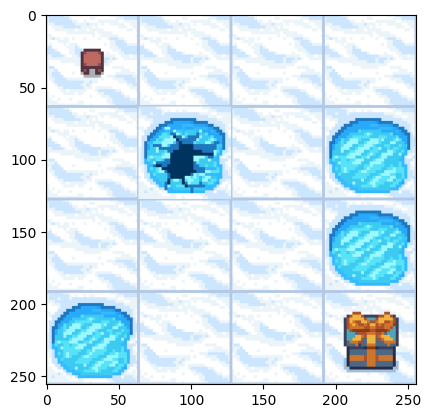

In [13]:

done = False
env.reset()

while not done:
  action = env.action_space.sample()
  state, reward, done, _, _  = env.step(action)
  img = env.render()

  plt.imshow(img)

  print("action:", action)
  print("state:", state)
  print("reward:", reward)
  print("=#####=")


In [14]:
def random_policy(state):
    return np.array([0.25] * 4)

In [15]:
action_probabilities = random_policy(state)
action_probabilities

array([0.25, 0.25, 0.25, 0.25])

In [16]:
env.reset()
done = False

while not done:
    action = np.random.choice(range(4), 1, p=action_probabilities)[0]
    state, reward, done, _, _ = env.step(action)

    print("action:", action)
    print("state:", state)
    print("reward:", reward)
    print("done:", done)
    print("=#####=")

    #img.set_data(env.render(mode='rgb_array'))
    #plt.axis('off')
    #display.display(plt.gcf())
    #display.clear_output(wait=True)
env.close()

action: 0
state: 0
reward: 0.0
done: False
=#####=
action: 1
state: 4
reward: 0.0
done: False
=#####=
action: 0
state: 4
reward: 0.0
done: False
=#####=
action: 2
state: 5
reward: 0.0
done: True
=#####=
